In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cv2 import imread

In [59]:
#load training and test data
train = pd.read_csv('./Dataset/train.csv')
test  = pd.read_csv('./Dataset/test.csv')
numExamples     = len(np.array(train['image_id']))
print("Number of examples in training set is %d" %numExamples)
print("Number of examples in test set is %d" %len(np.array(test['image_id'])))
print("Image dimesnison are %s" % str(image.shape))
train.head()

Number of examples in training set is 3215
Number of examples in test set is 1732
Image dimesnison are (256, 256, 3)


,image_id,label
0,train_1a,rice
1,train_1b,candy
2,train_1c,jam
3,train_1d,coffee
4,train_2a,vinegar


In [60]:
#load training data as images/ read images
Xtrain = np.zeros([numExamples, 256, 256, 3])
i = 0
for image_id in train['image_id']:
    Xtrain[i, :, : , :] = imread('./Dataset/train_img/'+str(image_id)+'.png')
    i += 1
print(Xtrain.shape)

(3215, 256, 256, 3)


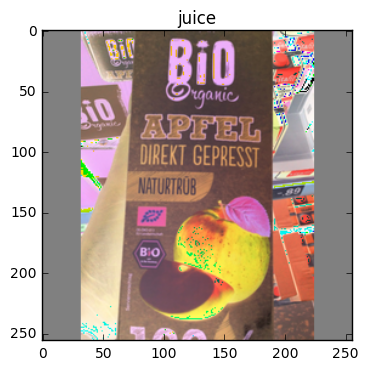

In [67]:
#display a sample image
plt.imshow(Xtrain[10])
plt.title(train['label'][10])
plt.show()



In [74]:
# Convert labels in the training data to class numbers
Ytrain = np.array(train['label'])
numClasses = len(np.unique(Ytrain))
print(np.unique(Ytrain))
print(Ytrain)
i = 0
for label in np.unique(Ytrain):
    Ytrain[Ytrain == label] = i
    i += 1
print(Ytrain)


['beans' 'cake' 'candy' 'cereal' 'chips' 'chocolate' 'coffee' 'corn' 'fish'
 'flour' 'honey' 'jam' 'juice' 'milk' 'nuts' 'oil' 'pasta' 'rice' 'soda'
 'spices' 'sugar' 'tea' 'tomatosauce' 'vinegar' 'water']
['rice' 'candy' 'jam' ..., 'nuts' 'candy' 'coffee']
[17 2 11 ..., 14 2 6]


In [71]:
#flatten the training data
Xtrain_flat = np.zeros([numExamples, 256 * 256 * 3])
for i in range(numExamples):
    Xtrain_flat[i] = Xtrain[i, :, :, :].reshape(256 * 256 * 3) 
    


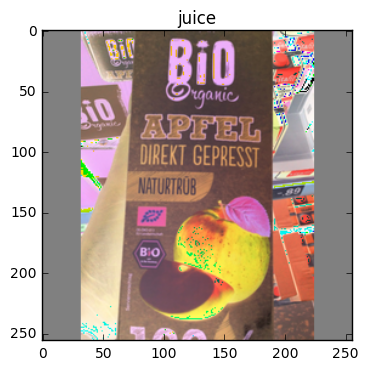

In [73]:
# cross the flattend data
plt.imshow(Xtrain_flat[10].reshape([256, 256, 3]))
plt.title(train['label'][10])
plt.show()


In [77]:
# Do one hot encoding for output labels
Ytrain_onehot = np.zeros([numExamples, numClasses])
for i in range(numExamples):
    Ytrain_onehot[i, Ytrain[i]] = 1
print(Ytrain_onehot)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
